Name: Alex Kuang

This example is based on the EDA example in Doing Data Science Ch. 2. There are 31 datasets named nyt1.csv, nyt2.csv,…,nyt31.csv, which you can find here: https://github.com/oreillymedia/doing_data_science. I have already downloaded the dataset for you to use under the folder: /nytdata

Each file represents one (simulated) day’s worth of ads shown and clicks recorded on the New York Times home page in May 2012. Each row represents a single user. There are five columns: age, gender (0=female, 1=male), number impressions, number clicks, and logged-in.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Lets start off analyzing one file

In [2]:
df =  pd.read_csv("dds_ch2_nyt/nyt1.csv") # read-in one file 
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


Once you have the data loaded, it’s time for some EDA:



Create a new variable, age_group, that categorizes users as "<18", "18-24", "25-34", "35-44", "45-54", "55-64", and "65+".

In [3]:
bins= [0,18,25,35,45,55,65,108]
labels = ['<18','18-24','25-34','35-44','45-54','55-64','65+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


<AxesSubplot:>

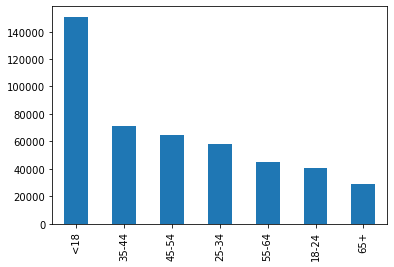

In [4]:
df['age_group'].value_counts().plot(kind='bar')

Plot the distributions of number impressions and click-through-rate for these six age categories.

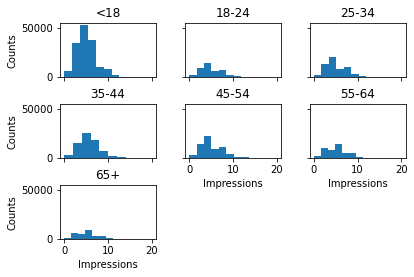

In [5]:
#TODO plot number of impressions
plt1 = df['Impressions'].hist(by=df['age_group'], rot=0, sharex=True, sharey=True)
for plt in plt1.flatten():
    plt.set_xlabel("Impressions")
    plt.set_ylabel("Counts")

The plot shows the distribution of Impressions amoung each age group, x-axis the number of impressiosn and y-axis the number of people

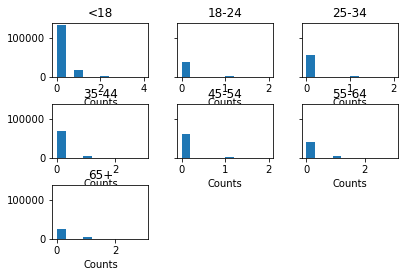

In [6]:
# TODO plot number of clicks
plt2 = df['Clicks'].hist(by=df['age_group'], rot=0, sharey=True)
for ax in plt2.flatten():
    ax.set_xlabel("Clicks")
    ax.set_xlabel("Counts")

The plot shows the distribution of Impressions amoung each age group, x-axis the number of clicksand y-axis the number of people

Explore the data and make visual and quantitative comparisons across user segments/demographics (<18-year-old males versus < 18-year-old females or logged-in versus not, for example).

Gender
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Impressions, dtype: object

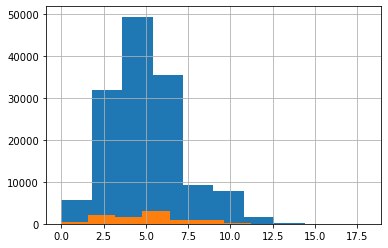

In [7]:
# TODO
plt3 = pd.DataFrame(df[df['age_group']=='<18'])
plt3['Impressions'].groupby(plt3['Gender']).hist()

The graph shows the comparsion Impressions between male and female under the age of 18, blue represens female and orange represents male

Gender
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Clicks, dtype: object

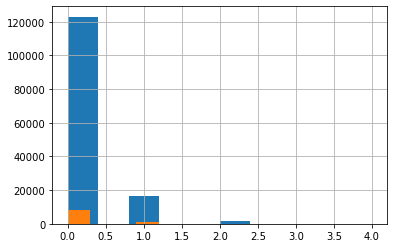

In [8]:
plt3['Clicks'].groupby(plt3['Gender']).hist(label=['Female', 'Male'])

The graph shows the comparsion Clicks between male and female under the age of 18. blue represents female and orange represents male

We analyzed just one file, but the dataset includes 31 files. You can easily aggregate the results into one dataframe as shown below. 

In [9]:
import glob # used to read mutliple-files 
files = glob.glob('dds_ch2_nyt/nyt*.csv')
dfs = []
for file in files:
    df = pd.read_csv(file)
    df['filename'] = file
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df

,Age,Gender,Impressions,Clicks,Signed_In,filename
0,63,1,2,0,1,dds_ch2_nyt/nyt17.csv
1,0,0,7,0,0,dds_ch2_nyt/nyt17.csv
2,0,0,8,0,0,dds_ch2_nyt/nyt17.csv
3,0,0,4,0,0,dds_ch2_nyt/nyt17.csv
4,61,1,6,0,1,dds_ch2_nyt/nyt17.csv
...,...,...,...,...,...,...
14905860,36,1,5,0,1,dds_ch2_nyt/nyt11.csv
14905861,38,0,3,0,1,dds_ch2_nyt/nyt11.csv
14905862,0,0,8,0,0,dds_ch2_nyt/nyt11.csv
14905863,31,1,5,0,1,dds_ch2_nyt/nyt11.csv


Analyze trends over time since we now have a historic view of the data over 31 days. You can examine how clicks or impresssions change over time by using the filename as the date field. 

<AxesSubplot:xlabel='filename'>

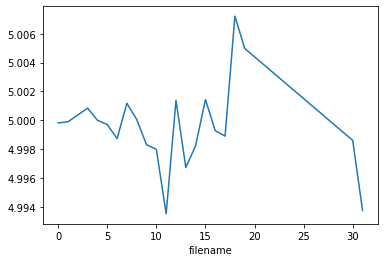

In [10]:
# TODO 
import matplotlib 
# df['filename'].str.split('/nyt')
# df.sort_index(key=df['filename'][1])
df['filename'] = df['filename'].str.lstrip('dds_ch2_nyt/nyt')
df['filename'] = df['filename'].str.rstrip('.csv')
df['filename'] = pd.to_numeric(df['filename'])
plt5 = df.groupby('filename')['Impressions'].mean()
plt5.plot.line()

I first have to strip the file name because of the sorting is base on string, after that I can plot it via the column average for each day. 
The graph shows the average impressions of each day.